### 데이터 준비

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from sklearn.datasets import fetch_california_housing  # 캘리포니아 주택 가격 예측 데이터


In [3]:
california_data = fetch_california_housing()
X, y = california_data.data, california_data.target

In [4]:
X = pd.DataFrame(X, columns=california_data.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### 전처리

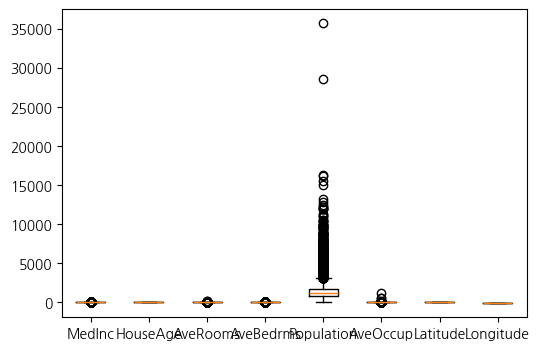

In [5]:
plt.figure(figsize=(6, 4))
plt.boxplot(X, tick_labels=california_data.feature_names)
plt.show()

In [6]:
# 결측치 처리
X.isnull().sum()  # 결측치 없음

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [7]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]], shape=(20640, 8))

In [8]:
# 범주형 데이터 - 원핫인코딩(get dummys), 레이블인코딩
X.info  # 범주형 feature 없음

# 이상치 처리
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
lower_q = Q1 - 1.5 * IQR
upper_q = Q3 + 1.5 * IQR
print(upper_q)



MedInc           8.013025
HouseAge        65.500000
AveRooms         8.469878
AveBedrms        1.239697
Population    3132.000000
AveOccup         4.561041
Latitude        43.380000
Longitude     -112.325000
dtype: float64


In [9]:
X_cleaned = X[~((X < lower_q) | (X > upper_q)).any(axis=1)]
X_cleaned

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


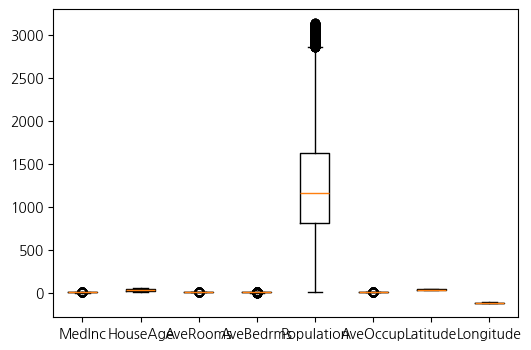

In [10]:
plt.figure(figsize=(6, 4))
plt.boxplot(X_cleaned, tick_labels=california_data.feature_names)
plt.show()

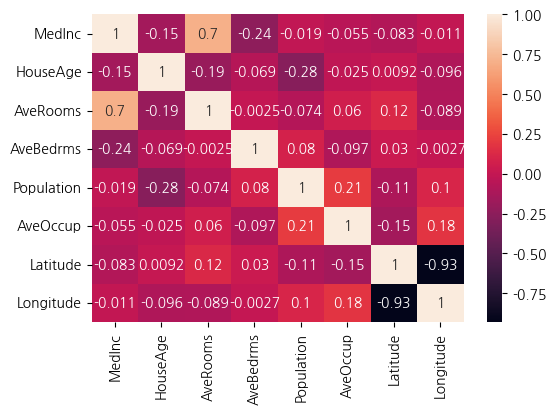

[]

In [11]:
# 연관도(상관계수)가 높은 특성 제거 - 다중공선성 제거
corr_matrix = X_cleaned.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True)
plt.show()

# print(corr_matrix['MedInc']['HouseAge'])
high_corr = [col for col in corr_matrix.columns if any((corr_matrix[col] > 0.9) & (corr_matrix[col] < 1.0))]
high_corr

In [19]:
# 새로운 특성 만들어보기
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_X_cleaned = poly.fit_transform(X_cleaned)
print(X_cleaned.shape)
print(poly_X_cleaned.shape)
# 44 = 8 + 8*7/2 + 8

poly_feature_names = poly.get_feature_names_out(X_cleaned.columns)
print(poly_feature_names)


(16842, 8)
(16842, 44)
['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude' 'MedInc^2' 'MedInc HouseAge' 'MedInc AveRooms'
 'MedInc AveBedrms' 'MedInc Population' 'MedInc AveOccup'
 'MedInc Latitude' 'MedInc Longitude' 'HouseAge^2' 'HouseAge AveRooms'
 'HouseAge AveBedrms' 'HouseAge Population' 'HouseAge AveOccup'
 'HouseAge Latitude' 'HouseAge Longitude' 'AveRooms^2'
 'AveRooms AveBedrms' 'AveRooms Population' 'AveRooms AveOccup'
 'AveRooms Latitude' 'AveRooms Longitude' 'AveBedrms^2'
 'AveBedrms Population' 'AveBedrms AveOccup' 'AveBedrms Latitude'
 'AveBedrms Longitude' 'Population^2' 'Population AveOccup'
 'Population Latitude' 'Population Longitude' 'AveOccup^2'
 'AveOccup Latitude' 'AveOccup Longitude' 'Latitude^2'
 'Latitude Longitude' 'Longitude^2']


In [20]:
poly_feature_df = pd.DataFrame(poly_X_cleaned, columns=poly_feature_names)
poly_feature_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc^2,MedInc HouseAge,...,Population^2,Population AveOccup,Population Latitude,Population Longitude,AveOccup^2,AveOccup Latitude,AveOccup Longitude,Latitude^2,Latitude Longitude,Longitude^2
0,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,52.669855,377.3848,...,246016.0,1389.920904,18773.60,-60631.04,7.852660,106.065537,-342.548249,1432.6225,-4626.7840,14942.6176
1,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,31.844578,293.4412,...,311364.0,1421.753425,21120.30,-68215.50,6.492025,96.439726,-311.486301,1432.6225,-4627.1625,14945.0625
2,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,14.793254,200.0024,...,319225.0,1232.528958,21385.25,-69071.25,4.758799,82.568533,-266.684363,1432.6225,-4627.1625,14945.0625
3,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,16.295754,209.9136,...,170569.0,883.777202,15632.05,-50489.25,4.579156,80.995078,-261.602332,1432.6225,-4627.1625,14945.0625
4,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,13.389013,190.2732,...,1196836.0,2328.474708,41396.96,-133741.50,4.530106,80.538833,-260.197471,1431.8656,-4625.9400,14945.0625


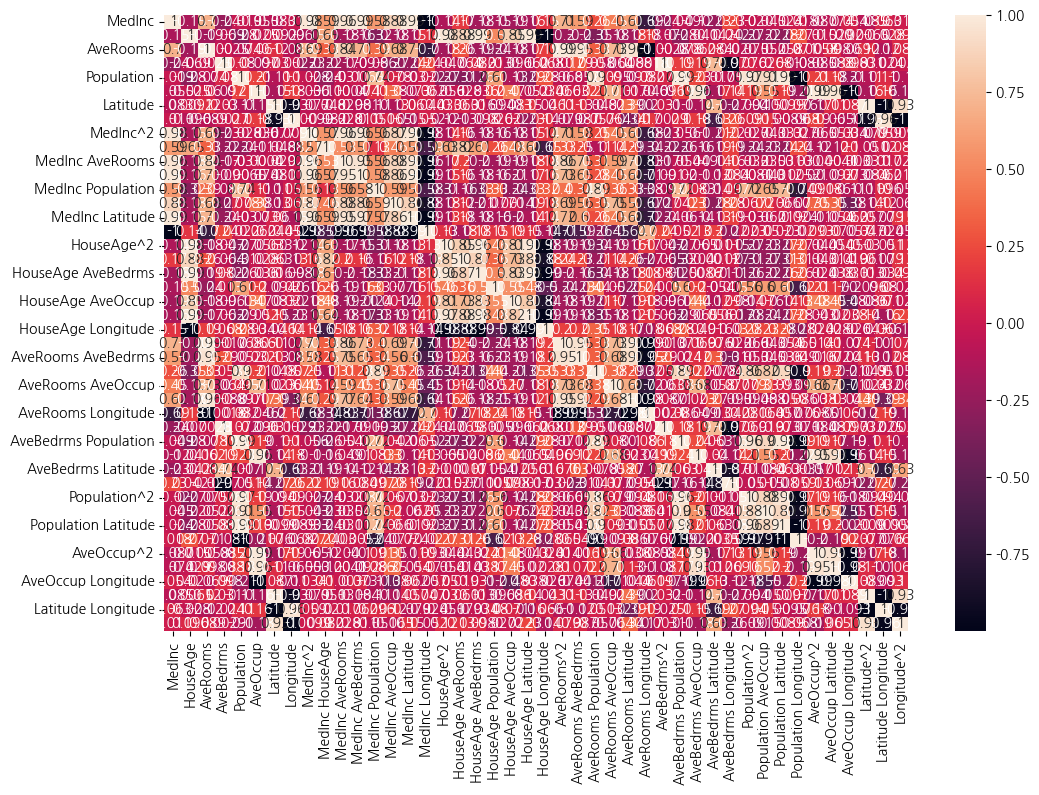

In [21]:
corr_matrix = poly_feature_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

[('MedInc', np.float32(0.4808104)), ('HouseAge', np.float32(0.06665614)), ('AveRooms', np.float32(0.04903776)), ('AveBedrms', np.float32(0.023315348)), ('Population', np.float32(0.02384444)), ('AveOccup', np.float32(0.14351654)), ('Latitude', np.float32(0.10850842)), ('Longitude', np.float32(0.10431097))]


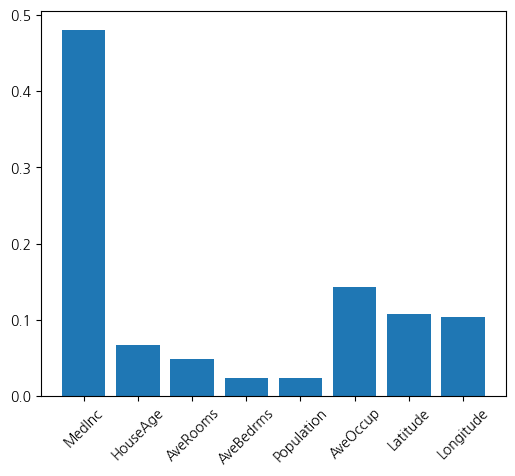

In [29]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor


# 중요한 피처 확인
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

model = XGBRegressor()
model.fit(X_train, y_train)

print(list(zip(X.columns, model.feature_importances_)))

plt.figure(figsize=(6, 5))
plt.bar(X.columns, model.feature_importances_)
plt.xticks(rotation=45)
plt.show()


In [31]:
# validation 진행해보기
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, train_size=0.6, random_state=11)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, train_size=0.5, random_state=11)

eval_set = [(X_train, y_train), (X_val, y_val)]

model = XGBRegressor(eval_metric="rmse", random_state=11, n_estimators=1000)
model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:0.92880	validation_1-rmse:0.94395
[1]	validation_0-rmse:0.78636	validation_1-rmse:0.81332
[2]	validation_0-rmse:0.69028	validation_1-rmse:0.72374
[3]	validation_0-rmse:0.62452	validation_1-rmse:0.66611
[4]	validation_0-rmse:0.58102	validation_1-rmse:0.63287
[5]	validation_0-rmse:0.54607	validation_1-rmse:0.60357
[6]	validation_0-rmse:0.52804	validation_1-rmse:0.58960
[7]	validation_0-rmse:0.50789	validation_1-rmse:0.57210
[8]	validation_0-rmse:0.48984	validation_1-rmse:0.55820
[9]	validation_0-rmse:0.47617	validation_1-rmse:0.54731
[10]	validation_0-rmse:0.46422	validation_1-rmse:0.53744
[11]	validation_0-rmse:0.45671	validation_1-rmse:0.53320
[12]	validation_0-rmse:0.45085	validation_1-rmse:0.53157
[13]	validation_0-rmse:0.44543	validation_1-rmse:0.52817
[14]	validation_0-rmse:0.43637	validation_1-rmse:0.52348
[15]	validation_0-rmse:0.42961	validation_1-rmse:0.52014
[16]	validation_0-rmse:0.42412	validation_1-rmse:0.51803
[17]	validation_0-rmse:0.42005	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=11, ...)

In [37]:
eval_result = model.evals_result()
train_set_rmse_result = eval_result["validation_0"]["rmse"]
val_set_rmse_result = eval_result["validation_1"]["rmse"]


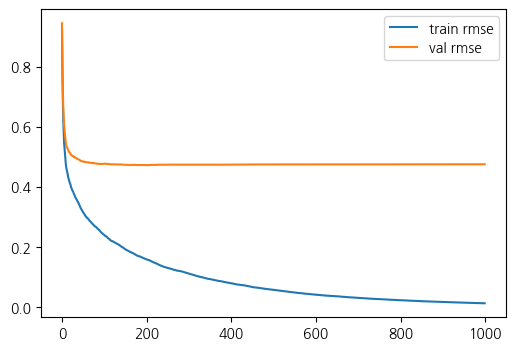

In [39]:
plt.figure(figsize=(6, 4))
plt.plot(train_set_rmse_result, label="train rmse")
plt.plot(val_set_rmse_result, label="val rmse")
plt.legend()
plt.show()